In [1]:
!pip install emoji --upgrade
!pip install jovian --upgrade

import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=b1bcf36962a3ac3615ba18569c61d85db9b3120b50537cee006d70241b898a9e
  Stored in directory: c:\users\rahil\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=1b3920062bf4c4033a1dc53fc0056c272237ba7c016a838480abf79d188d0d0e
  Stored in directory: c:\users\rahil\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid


<IPython.core.display.Javascript object>

ModuleNotFoundError: No module named 'wordcloud'

In [7]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df


In [8]:
filename = r"C:\Users\Rahil\Desktop\College\Resume\projects\whatsapp_chat_analysis\whats_data.txt"
df = rawToDf(filename, '12hr')

In [9]:
df

,date_time,user,message
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨..."
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...
...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup


In [10]:
df.shape

(13655, 3)

In [12]:
images = df[df['message'] == "<Media omitted> "]
images.shape

(687, 3)

In [13]:
df['user'].unique()

array(['group_notification', '+91 96536 93868',
       'Dheeraj Lalwani (TSEC, CS)', '+91 99201 75875', '+91 95949 08570',
       '+91 79778 76844', '+91 90499 38860', 'Tanay Kamath (TSEC, CS)',
       'Saket (TSEC, CS)', '+91 77568 95072', 'Rohit Pathak (TSEC, CS)',
       '+91 75078 05454', 'Darshan Rander (TSEC, IT)', '+91 79774 68083',
       '+91 70394 60876', '+91 96191 55044', '+91 90678 93300',
       'Mohit Varma (TSEC, CS)', '+91 79770 56210',
       'Chirag Sharma (TSEC, CS)', 'Vivek Iyer (TSEC, Biomed)',
       'Tushar Nankani', '+91 81696 22410', '+91 89764 07509',
       '+91 78758 66747', 'Ankit (TSEC, CS)', '+91 86556 33169',
       '+91 76663 28147', '+91 88284 70904', '+91 97698 67348',
       'Vivek (TSEC, CS)', 'Hardik Raheja (TSEC, CS)', '+91 91680 38866',
       'Pranay Thakur (TSEC, CS)', 'Mittul Dasani (TSEC, CS)',
       'Kartik Soneji (TSEC, CS)', '+91 77180 43697', '+91 99676 84479',
       'Shreya (TSEC, IT)', '+91 96190 16721', '+91 89833 85127',
       '+9

Many people are there in this group

Let us find the number of users in this group

In [16]:
len(df['user'].unique())

155

So, we find that there are in total 155 people who have texted in the group

In [17]:
df.drop(images.index, inplace=True)

Over here we deleted the images as they are no of no use for us currently. As in this project we not going to analyze images.

In [18]:
df.reset_index(inplace=True, drop=True)

In [19]:
df.shape

(12968, 3)

So, we get 12,968 rows of data for the analysis after cleaning and processing the data 

# So, let's start analyzing the data

In [21]:
df1= df.groupby("user")["message"].count().sort_values(ascending=False)
df1.head()

user
Tanay Kamath (TSEC, CS)        2404
Dheeraj Lalwani (TSEC, CS)     1821
Darshan Rander (TSEC, IT)      1366
Kartik Soneji (TSEC, CS)        826
Harsh Kapadia (TSEC IT, SE)     754
Name: message, dtype: int64

We find that the user Tanay Kamath was the most active on the whatsapp group.  

In [22]:
df.sample(10)

,date_time,user,message
676,2020-02-12 18:35:00,"Dheeraj Lalwani (TSEC, CS)",@918247578176 we seriously need some help Tha...
9437,2020-08-15 00:23:00,"Harsh Kapadia (TSEC IT, SE)",Majak mat kar
3352,2020-03-20 23:14:00,+91 81696 22410,
4298,2020-04-11 20:38:00,+91 97681 67131,Can someone help me with a example and explain...
767,2020-02-14 19:42:00,"Dheeraj Lalwani (TSEC, CS)",Me
12871,2020-10-01 00:12:00,+91 88284 70904,Ah okay
10382,2020-08-30 00:25:00,"Harsh Kapadia (TSEC IT, SE)",👍
9668,2020-08-24 11:45:00,+91 72495 29889,😂😂😂
3667,2020-03-24 21:06:00,+91 97571 15289,💯
12489,2020-09-26 20:31:00,"Dheeraj Lalwani (TSEC, CS)",Just so amazing!


We see there are some empty strings this maybe because it might contain emojis*

In [24]:
df.sample(10)

,date_time,user,message
4570,2020-04-15 22:43:00,"Pratik K (TSEC CS, SE)","``` int3(x,n,m) bool check = 1; ..."
4868,2020-04-23 19:33:00,+91 70450 40641,😂😂😂
6700,2020-06-05 18:09:00,"Tanay Kamath (TSEC, CS)",+1
10577,2020-09-03 14:05:00,"Harsh Kapadia (TSEC IT, SE)",Damn they partnered with repl.it
11561,2020-09-13 20:10:00,+91 97739 65140,This message was deleted
5273,2020-05-02 01:19:00,"Tanay Kamath (TSEC, CS)",can i get the solution to this problem(in Java...
10369,2020-08-28 00:45:00,"Darshan Rander (TSEC, IT)",Yes do ask her questions
3512,2020-03-21 19:54:00,"Saurav Upoor (TSEC CS, SE)",Do dry run and see whats happening
6913,2020-06-12 21:31:00,"Kartik Soneji (TSEC, CS)",Log mujhe puch rahe hai ki mai kaha ja raha hu...
11704,2020-09-15 10:37:00,"Harsh Kapadia (TSEC IT, SE)",😂


In [25]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 


In [26]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [27]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Tanay Kamath (TSEC, CS)        2404
Dheeraj Lalwani (TSEC, CS)     1821
Darshan Rander (TSEC, IT)      1366
Kartik Soneji (TSEC, CS)        826
Harsh Kapadia (TSEC IT, SE)     754
                               ... 
+91 96194 00980                   1
+91 89833 85127                   1
+91 75064 86714                   1
+91 97847 88658                   1
+91 98709 38217                   1
Name: user, Length: 153, dtype: int64

In [28]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Tanay Kamath (TSEC, CS)',
 'Dheeraj Lalwani (TSEC, CS)',
 'Darshan Rander (TSEC, IT)',
 'Kartik Soneji (TSEC, CS)',
 'Harsh Kapadia (TSEC IT, SE)']

In [29]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,message,weekday,is_weekend
114,2020-01-27 19:31:00,"Dheeraj Lalwani (TSEC, CS)",Alright,Monday,False
115,2020-01-27 19:32:00,"Dheeraj Lalwani (TSEC, CS)",We can make this a trend,Monday,False
117,2020-01-27 19:32:00,"Dheeraj Lalwani (TSEC, CS)",Everyday a new challenge,Monday,False
119,2020-01-27 19:43:00,"Dheeraj Lalwani (TSEC, CS)",Yeah,Monday,False
120,2020-01-27 19:44:00,"Dheeraj Lalwani (TSEC, CS)",Something or the other So that we can build o...,Monday,False


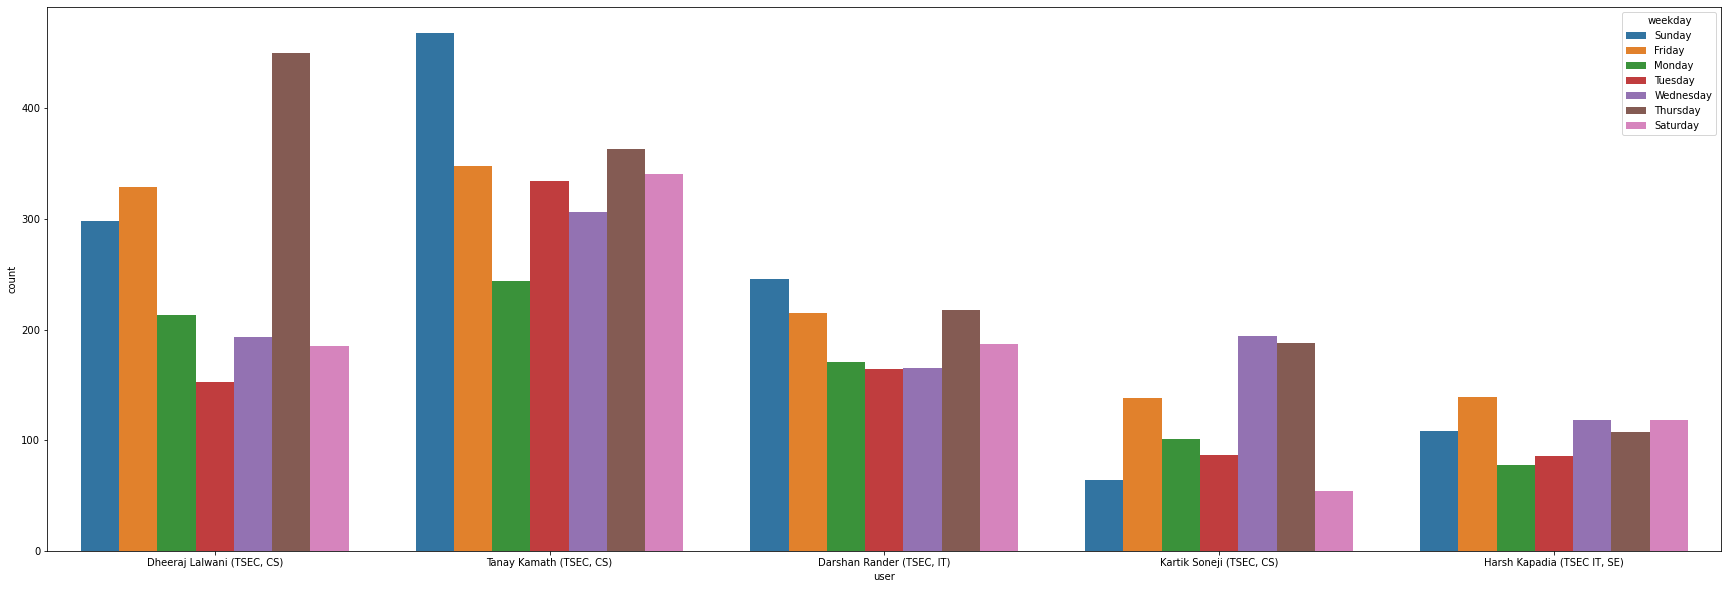

In [37]:
plt.figure(figsize=(30,10))
sns.countplot(x=df_top5['user'], hue="weekday", data=df)
plt.show()